In [1]:

import cobra
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
model = cobra.io.read_sbml_model('/home/student/Downloads/new_thecaphora.xml')
model.reactions.BIOMASS.objective_coefficient=1
model.optimize()

'' is not a valid SBML 'SId'.


,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-1.733059e-02
1.1.1.127-RXN_c,0.0,3.642919e-17
1.1.1.178-RXN_c,0.0,1.561251e-17
1.1.1.190-RXN_c,0.0,-1.733059e-02
1.1.1.210-RXN_c,0.0,1.561251e-17
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000e+00
EX_P-AMINO-BENZOATE_e,0.0,0.000000e+00
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000e+00
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,-2.599588e-02


In [2]:
model.reactions.__getattr__('BIOMASS')

Reaction identifier,BIOMASS
Name,
Memory address,0x07fbf73c00fa0
Stoichiometry,0.000279 ACETYL-COA_c + 0.28742 ARG_c + 0.234232 ASN_c + 54.119975 ATP_c + 0.129799 CTP_c + 0.088988 CYS_c + 0.255712 GLN_c + 0.255712 GLT_c + 0.595297 GLY_c + 0.209121 GTP_c + 0.092056 HIS_c +... 0.000279 + 0.28742 + 0.234232 + 54.119975 + 0.129799 + 0.088988 + 0.255712 + 0.255712 + 0.595297 + 0.209121 + 0.092056 + 0.282306 + 0.499149 + 0.234232 + 0.437778 + 0.333448 + 3.1e-05 + 0.149336 +...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [3]:
biomass= model.reactions.__getattr__('BIOMASS').metabolites
print(biomass)

{<Metabolite TRP_c at 0x7fbf741d8550>: -0.055234, <Metabolite GLT_c at 0x7fbf74175ac0>: -0.255712, <Metabolite MALONYL-COA_c at 0x7fbf74211d90>: -3.1e-05, <Metabolite GTP_c at 0x7fbf74203e80>: -0.209121, <Metabolite NADP_c at 0x7fbf74175d30>: -0.000112, <Metabolite WATER_c at 0x7fbf74175fa0>: -48.752916, <Metabolite LEU_c at 0x7fbf741e9130>: -0.437778, <Metabolite ASN_c at 0x7fbf741ac340>: -0.234232, <Metabolite L-ASPARTATE_c at 0x7fbf74175c70>: -0.234232, <Metabolite L-ALPHA-ALANINE_c at 0x7fbf741d8e50>: -0.499149, <Metabolite ARG_c at 0x7fbf741e9be0>: -0.28742, <Metabolite TYR_c at 0x7fbf741dc790>: -0.133993, <Metabolite THR_c at 0x7fbf741dca90>: -0.246506, <Metabolite CTP_c at 0x7fbf741f74c0>: -0.129799, <Metabolite SER_c at 0x7fbf741ace50>: -0.209684, <Metabolite ATP_c at 0x7fbf74175880>: -54.119975, <Metabolite GLN_c at 0x7fbf74175460>: -0.255712, <Metabolite MET_c at 0x7fbf74175250>: -0.149336, <Metabolite LYS_c at 0x7fbf741753a0>: -0.333448, <Metabolite ACETYL-COA_c at 0x7fbf741

In [4]:

r=model.reactions.__getattr__('BIOMASS').reaction

#steckt die ganzen namen in eine liste für später
#entferne "_c" da bei allen ids
ids = np.array([ item.id.replace("_c","") for item in biomass.keys()])

#alle absoluten verhältnisse
q = np.abs( list(biomass.values()))


In [5]:
#sortiere die drei listen nach der größe von anteilen.
#packt Listen in ein gedrehtes array
#((a1,a2,a3), (b1,b2,b3)) => ((a1, b2), (a2,b2), (a3,b3))
zipped = zip(ids, q)
#sortiert nach ersten zeile, also ( a1, a2, a3)
sorted_zip = sorted( zipped, key=lambda x: x[0])
#((a1, b2), (a2,b2), (a3,b3)) => ((a1,a2,a3), (b1,b2,b3))
unzipped = zip(*sorted_zip)
ids, q = unzipped
#anteile = np.array( anteile)
ids = np.array(ids)
q = np.array(q)

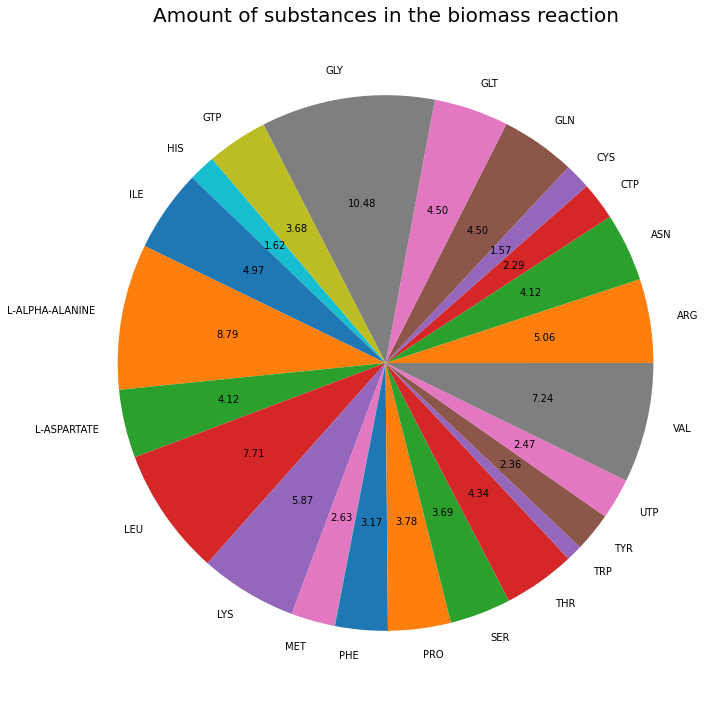

In [6]:
#alles mit einem verhältniss von > 40% wird herausgefiltert
#hits ist ein Boolsches (True/False) numpy array
hits = q < 40
#man kann numpy arrays bool arrays übergeben und es gibt dann alle stellen zurück die True sind.
ids_part = ids[hits]
#weights_part = weights[hits]
#anteile_part = anteile[hits]
q_part = q[hits]

fig = plt.figure(figsize=(12, 20)) 
labels = [f'{id}' if q > 0.03 else '' for id, q in zip(ids_part, q_part)]
plt.title("Amount of substances in the biomass reaction", size=20)
plt.pie(q_part, labels=labels, autopct=(lambda p: "{:.2f}".format(p) if p > 1.5 else ''), textprops={'fontsize': 10})
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/percentage of metabolites in the biomass reaction.pdf', bbox_inches="tight")
plt.show()
